***
## Assessed project
This project will be assessed.  You will need to finish the work by the XXXX of XXXX.

You will load in the data from the Project folder
You will need to format the data and then plot it in a set format.
The figure you create will then need to be saved and imported in to a document
Once the figure in the document you will need to add the given text.
This Project will walk you through what you need to do.

The data used in this project is spectroscopy data taken of a single light emitting molecule.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

***
### Load in the data
In the folder titled ProjectData you will find a CSV file called MoleculeAndNoiseData and a numpy file called switchingData.npy.
You will need to load both of these files in to variables, so that we can process and plot the data.
#### First
Load the CSV file in to an array, a good name for the variable would be moleculeAndNoise. The first and the third column contain the time data in milliseconds. The second column contains the integrated signal from the emission of a single molecule. The final (fourth) column contains the same data collected when no molecule is present, this represents the background noise of the detector.

It is sensible to plot the two data sets, (columns 1 and 2 and columns 3 and 4) to make sure they make sense although for the assessment this is optional.

#### Second
The second set of data is stored in a numpy file, this contains the emission from a single molecule which stops emitting half ay though the experiment. The numpy array contains two columns, the first is time in ms and the second is the integrated photon count. Load this data in to a variable, a good name is switchingData.

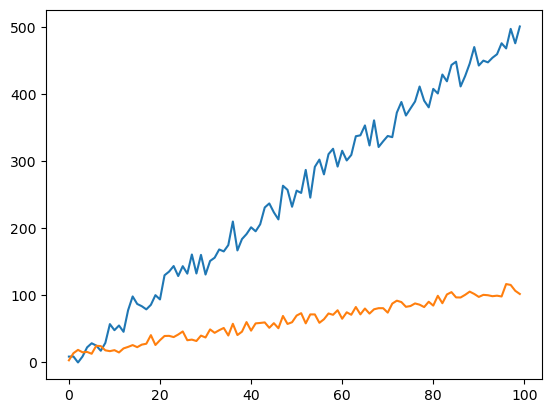

In [2]:
# Load the csv data
moleculeAndNoise = np.genfromtxt('ProjectData/MoleculeAndNoise.csv',delimiter=',', skip_header=1)
plt.plot(moleculeAndNoise[:,0], moleculeAndNoise[:,1])
plt.plot(moleculeAndNoise[:,2], moleculeAndNoise[:,3])

***
### Process the data
You should now have two data sets:
1.) One called moleculeAndNoise which contains four columns, the first and third contain the time in ms the data was collected over. The second contains the integrated photons collected from a single molecule. The fourth contains the photons collected from an area of the sample with no emitting molecules, i.e. the background signal.
2.) The second data set contains data collected from a single molecule which stops emitting photons halve way through the experiment. This data set contains two columns, the first is the time in ms and the second is the integrated photon count.

#### First
For the first data set, called moleculeAndNoise, fit the molecules photon output using the stats.linregress function. This is the first and second column. Using the slope and the intercept generate a new data set for the fit, which covers the x data range of the original data, call this variable fitData.

#### Second
For the second data set, called switching data fit the first. Fit the first 50 data points, this is the time when the molecule is emitting photons. With the intercept and slope, create a new set of data called switchFit. This new data set should extend past the original 50 data points, create the switchFit so that it is 150 ms in length starting at 0ms.




In [3]:
# load the data to fit
# CSV data
slope, intercept, r_value, p_value, std_err = stats.linregress(moleculeAndNoise[:,0], moleculeAndNoise[:,1])
fitData = intercept + slope * moleculeAndNoise[:,0]

# Numpy data
switchingData = np.load("ProjectData/switchingdata.npy")
slope, intercept, r_value, p_value, std_err = stats.linregress(switchingData[:50,0], switchingData[:50,1])
xData = np.linspace(0,149,150)
switchFit = intercept + slope * xData

### Plot the data
<p align="left">
<img src="Figures/Outline.png" alt="drawing" width="1400"/>
</p>

Build a figure which has three areas one on the left and two on the right as shown above.


In the single large area on the left plot the data contained in moleculeAndNoise. The data collected from the molecule should be plotted in red and the background data should be plotted in black. The plot should have a legend, the x-axis should be labelled time [ms] and the y-axis should be labelled signal [counts].

In the top right hand area plot the molecule data from the moleculeAndNoise file in small red dots label this molecule. On the same axis plot the fitted data, label this fit. The plot should have a legend, the x-axis should be labelled time [ms] and the y-axis should be labelled signal [counts].

In the bottom right hand area plot the switching data.  Plot the first 50 points of the data in red dots, label this as 'On' and the last 50 points as a black line, label this as 'Off'. On the same plot, plot the fitted data extended up to 150 ms. The plot should have a legend, the x-axis should be labelled time [ms] and the y-axis should be labelled signal [counts].

Finally title the entire figure as 'Single Molecule data'. The final figure should look like the example below.

<p align="left">
<img src='Figures/Answer.png' alt="drawing" width="1400"/>
</p>



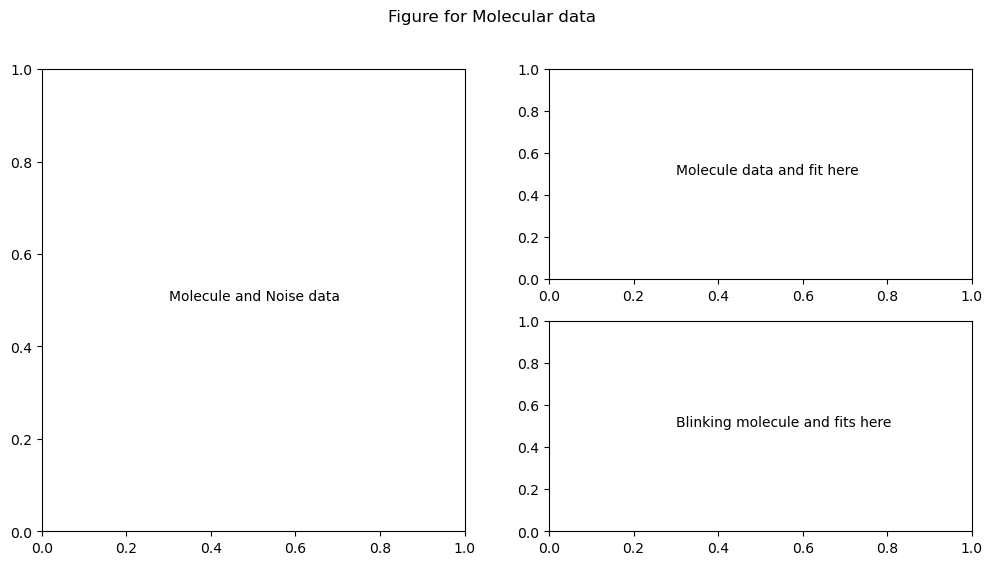

In [4]:
fig=plt.figure(figsize=(12,6))

ax_1=fig.add_subplot(1,2,1)
ax_1.text(0.3,0.5, "Molecule and Noise data")
ax_2=fig.add_subplot(2,2,2)
ax_2.text(0.3,0.5, "Molecule data and fit here")
ax_3=fig.add_subplot(2,2,4)
ax_3.text(0.3,0.5, "Blinking molecule and fits here")

fig.suptitle("Figure for Molecular data")
fig.savefig("Figures/Outline.png")

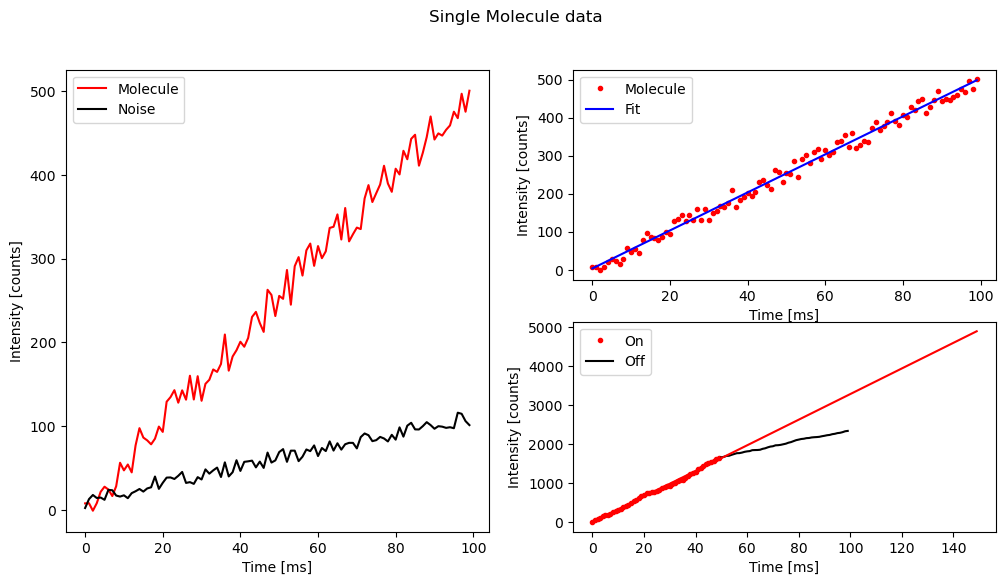

In [5]:
fig=plt.figure(figsize=(12,6))

ax_1=fig.add_subplot(1,2,1)
ax_1.plot(moleculeAndNoise[:,0], moleculeAndNoise[:,1], 'r', label='Molecule')
ax_1.plot(moleculeAndNoise[:,2], moleculeAndNoise[:,3], 'k', label='Noise')
ax_1.legend()
ax_1.set_xlabel("Time [ms]")
ax_1.set_ylabel("Intensity [counts]")

ax_2=fig.add_subplot(222)
ax_2.plot(moleculeAndNoise[:,0], moleculeAndNoise[:,1], 'r.', label='Molecule')
ax_2.plot(moleculeAndNoise[:,0], fitData, 'b', label='Fit')
ax_2.legend()
ax_2.set_xlabel("Time [ms]")
ax_2.set_ylabel("Intensity [counts]")

ax_3=fig.add_subplot(224)
ax_3.plot(switchingData[:50, 0], switchingData[:50, 1], 'r.', label='On')
ax_3.plot(switchingData[50:, 0], switchingData[50:, 1], 'k', label='Off')
ax_3.plot(xData, switchFit, 'r')
ax_3.legend()
ax_3.set_xlabel("Time [ms]")
ax_3.set_ylabel("Intensity [counts]")


fig.suptitle("Single Molecule data")
fig.savefig('Figures/Answer.png')
